In [9]:
import pandas as pd
import os, glob
import numpy as np
import matplotlib.pyplot as plt

In [125]:
f = "/home/ml/Documents/Not_TADSS_Videos/MC61/cut/dlc_output_16-810/MC61_7-2-19_L2_crossing4_patternD_light1_DLC_resnet101_LadderWalkFeb13shuffle1_1030000.h5"

In [126]:
df = pd.read_hdf(f)

In [127]:
df = df["DLC_resnet101_LadderWalkFeb13shuffle1_1030000"]["left fingers"]

In [128]:
df = df.loc[df.likelihood>0.1]

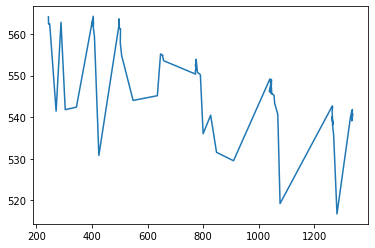

In [129]:
plt.plot(df.x,df.y)

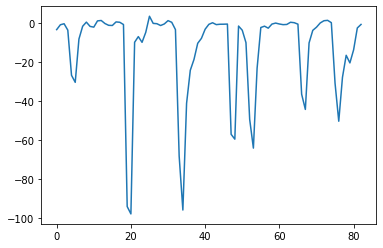

In [130]:
plt.plot(np.gradient(df.x))

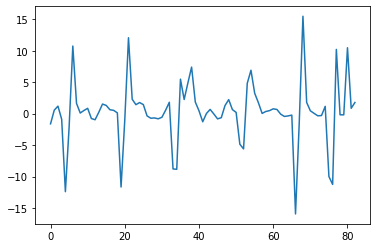

In [131]:
plt.plot(np.gradient(df.y))

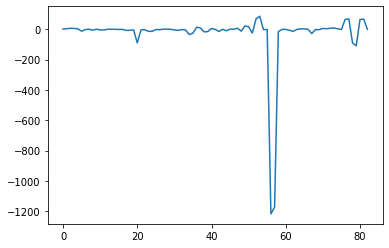

In [132]:
plt.plot(np.gradient(df.x,df.y))

In [133]:
from scipy.signal import find_peaks

In [149]:
second = np.gradient(np.gradient(df.x,df.y))
peak_ind = find_peaks(second,prominence=20)[0]
peak_2 = np.append(peak_ind,find_peaks(-second,prominence=20)[0])

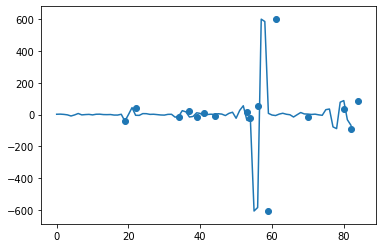

In [150]:
plt.plot(second)
plt.scatter(df.x.index[peak_2],second[peak_2])

In [151]:
len(peak_2)

16

In [188]:
second_x = np.gradient(np.gradient(df.x))
pos_peak_x = find_peaks(second_x,prominence=5,width=1,height=10,distance=5)[0]
neg_peak_x = find_peaks(-second_x,prominence=5,width=1,height=10,distance=5)[0]
peak_x = np.append(pos_peak_x,neg_peak_x)
peak_x = np.sort(peak_x)

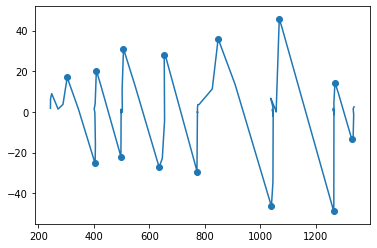

In [189]:
plt.plot(df.x,second_x)
plt.scatter(df.x.iloc[peak_x],second_x[peak_x])

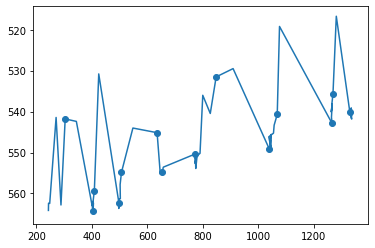

In [194]:
plt.plot(df.x,df.y)
plt.scatter(df.x.iloc[peak_x],df.y.iloc[peak_x])
plt.gca().invert_yaxis()

In [195]:
peak_x

array([ 4,  6, 19, 21, 33, 35, 47, 49, 52, 54, 66, 68, 75, 77])

In [111]:
find_peaks(second,prominence=15)

(array([  3,  13,  35,  44,  63,  73,  80,  86,  89,  94, 103, 118, 122,
        132, 136, 140, 148, 150, 156, 164, 170]),
 {'prominences': array([889.73134139,  26.70427928, 117.8939203 ,  17.0969699 ,
          31.75094255,  16.73679489, 126.84511221,  17.59087402,
          15.9101299 ,  23.45607376,  39.5440266 ,  26.00660592,
          64.97761765, 770.18990885,  41.21525024,  17.29839124,
          23.98089358, 101.35485153,  47.78371671,  67.10854347,
          72.74145407]),
  'left_bases': array([  0,   6,   6,  37,  46,  65,   6,  84,  88,  88, 101, 115, 101,
           6, 134, 138, 134, 134, 152, 161, 134]),
  'right_bases': array([  6,  33,  78,  46,  78,  78, 124, 101,  92, 101, 120, 120, 124,
         134, 138, 146, 149, 168, 161, 168, 171])})

In [112]:
len(find_peaks(second,prominence=15)[0])

21

In [80]:
left = np.unique(find_peaks(np.gradient(np.gradient(df.x,df.y)),prominence=10)[1]['left_bases'])

In [81]:
right = np.unique(find_peaks(np.gradient(np.gradient(df.x,df.y)),prominence=10)[1]['right_bases'])

In [82]:
new_left = []
new_right = []

In [83]:
for x in left:
    if x not in right:
        new_left.append(x)
    else:
        continue

In [84]:
for x in right:
    if x not in left:
        new_right.append(x)
    else:
        continue

In [85]:
new_left

[0, 24, 37, 65, 84, 88, 115, 152]

In [86]:
new_right

[11, 33, 60, 78, 92, 120, 124, 146, 149, 154, 168, 171]